<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#hexbin-testing" data-toc-modified-id="hexbin-testing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>hexbin testing</a></span><ul class="toc-item"><li><span><a href="#NASA's-website-is-down-so-i-nabbed-covid-data-from-kaggle" data-toc-modified-id="NASA's-website-is-down-so-i-nabbed-covid-data-from-kaggle-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>NASA's website is down so i nabbed covid data from kaggle</a></span></li></ul></li><li><span><a href="#nice-basemaps" data-toc-modified-id="nice-basemaps-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>nice basemaps</a></span></li><li><span><a href="#hex-tests-look-nice" data-toc-modified-id="hex-tests-look-nice-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>hex tests look nice</a></span></li></ul></div>

# hexbin testing
## NASA's website is down so i nabbed covid data from kaggle
it's suitably geospatial
https://www.kaggle.com/gpreda/coronavirus-2019ncov

In [10]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
wd = os.getcwd()
path = wd+'/data/covid-19-all.csv'
df = pd.read_csv(path)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717375 entries, 0 to 717374
Data columns (total 8 columns):
Country/Region    717375 non-null object
Province/State    680342 non-null object
Latitude          717374 non-null float64
Longitude         717374 non-null float64
Confirmed         717356 non-null float64
Recovered         716987 non-null float64
Deaths            716934 non-null float64
Date              717375 non-null object
dtypes: float64(5), object(3)
memory usage: 43.8+ MB


In [8]:
df.columns

Index(['Country/Region', 'Province/State', 'Latitude', 'Longitude',
       'Confirmed', 'Recovered', 'Deaths', 'Date'],
      dtype='object')

In [29]:
df['Date'].describe

<bound method NDFrame.describe of 0         2020-01-22
1         2020-01-22
2         2020-01-22
3         2020-01-22
4         2020-01-22
             ...    
717370    2020-10-03
717371    2020-10-03
717372    2020-10-03
717373    2020-10-03
717374    2020-10-03
Name: Date, Length: 717375, dtype: object>

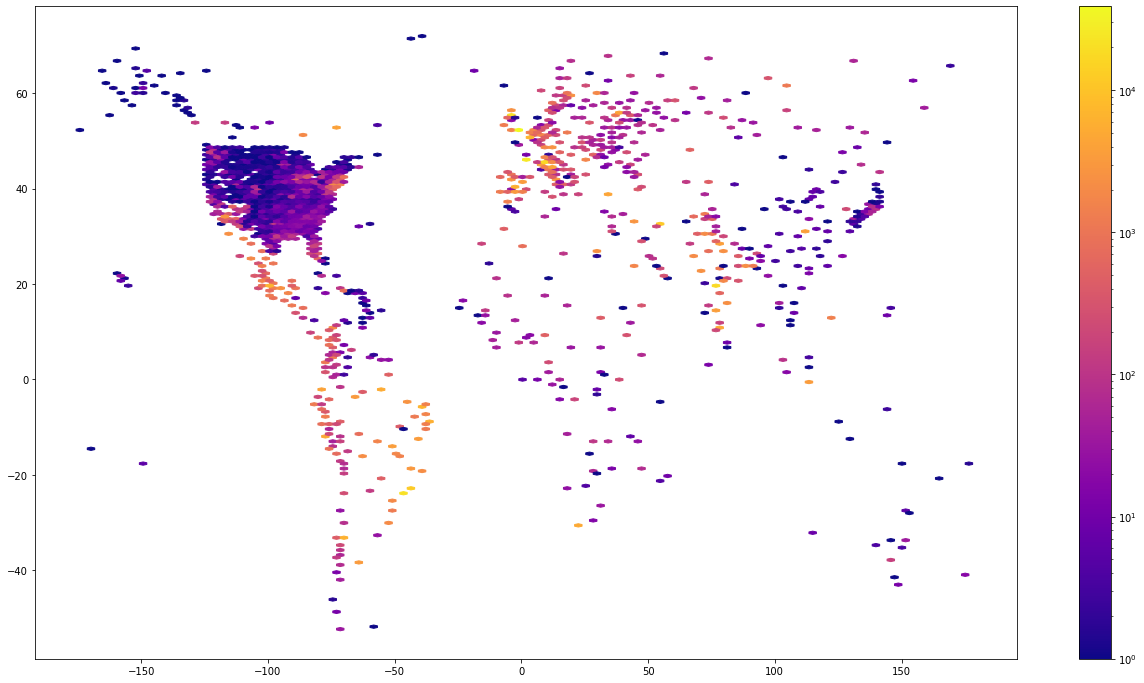

In [32]:
def draw_hexbin(df, grid=(120,120)):
    x = df['Longitude']
    y = df['Latitude']
    C = df['Deaths']
    hx = plt.hexbin(x,y,C,gridsize=grid, cmap='plasma', bins='log')
    cb = plt.colorbar(hx)
    plt.show()
plt.figure(figsize=(22,12))
draw_hexbin(df)

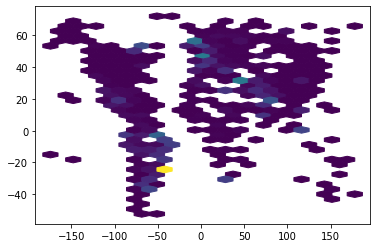

In [14]:
draw_hexbin(df, (20,20))

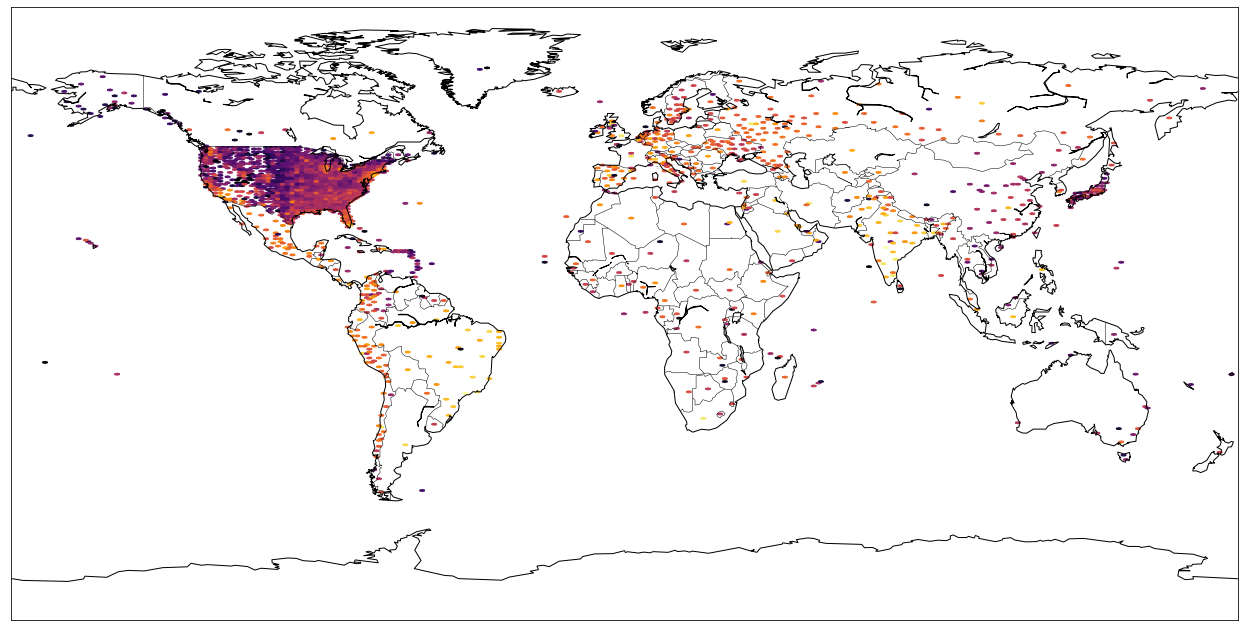

In [37]:
from mpl_toolkits.basemap import Basemap
x = df['Longitude']
y = df['Latitude']
C = df['Confirmed']

fig = plt.figure(figsize=(22,12))
m = Basemap()
m.drawcoastlines()
m.drawcountries()
m.hexbin(x,y,C=C, gridsize=(250), cmap='inferno', bins='log')
plt.show()
# plt.savefig('test.png')

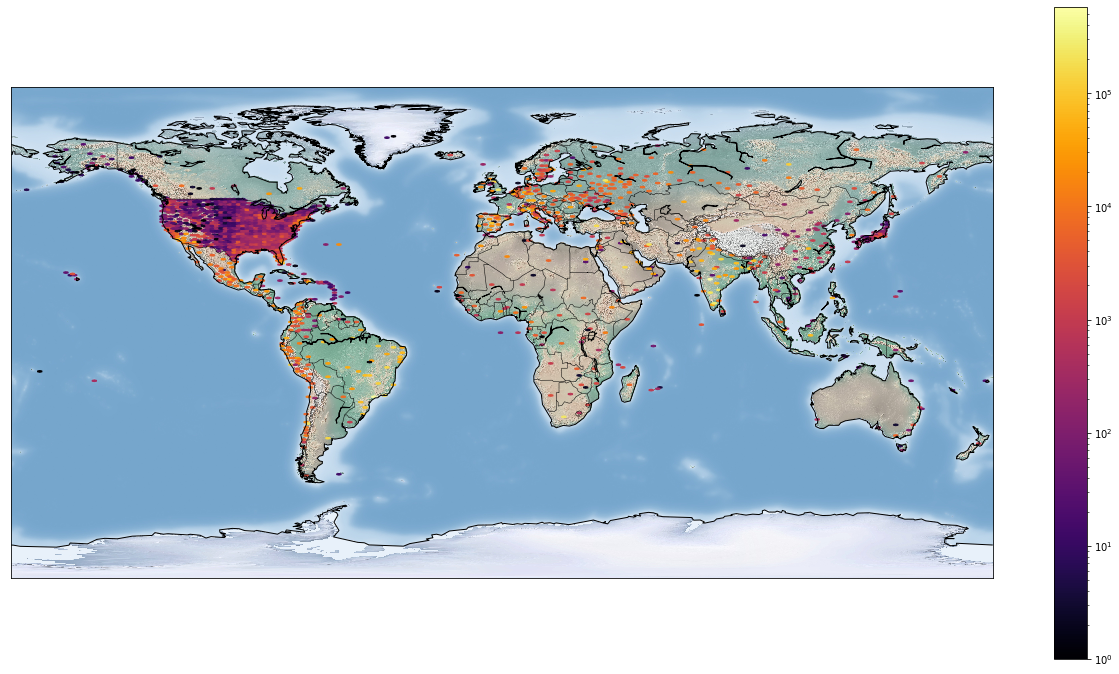

In [40]:

from mpl_toolkits.basemap import Basemap
x = df['Longitude']
y = df['Latitude']
C = df['Confirmed']

fig = plt.figure(figsize=(22,12))
m = Basemap()
m.drawcoastlines()
m.drawcountries()

m.shadedrelief() # graphic overlay
hx = m.hexbin(x,y,C=C, gridsize=(220), cmap='inferno', bins='log')
cb = plt.colorbar(hx)
plt.show()
# plt.savefig('test.png')

# nice basemaps

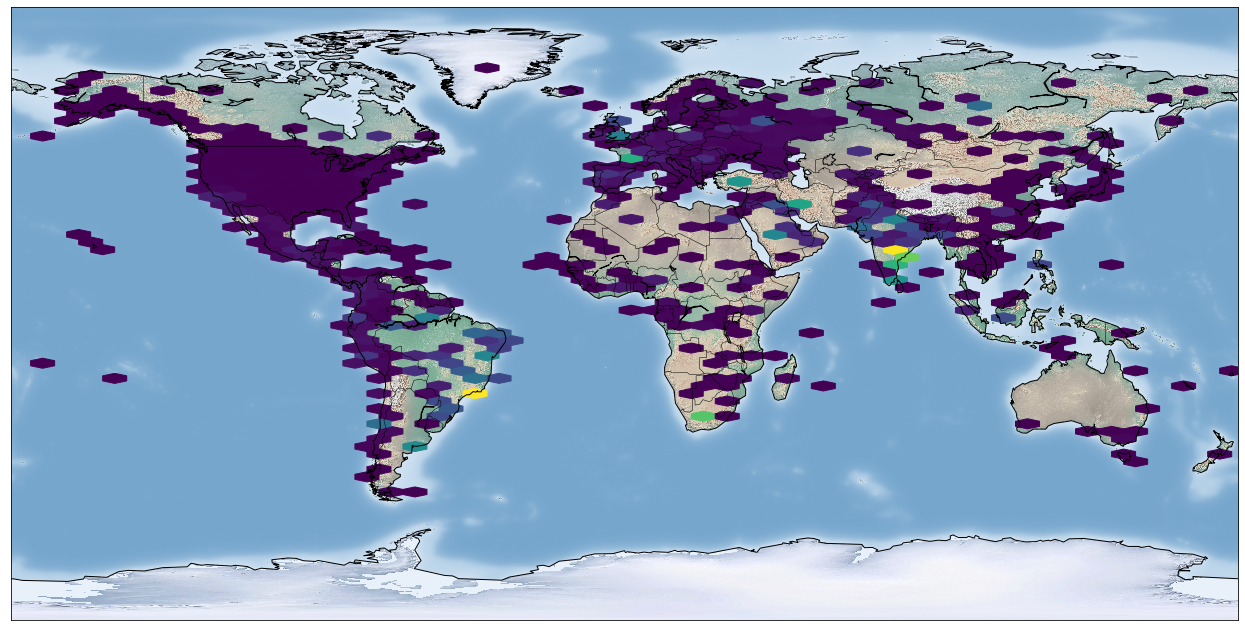

In [23]:
plt.figure(figsize=(22,12))
m = Basemap()
m.drawcoastlines()
m.drawcountries()
m.shadedrelief() # graphic overlay
m.hexbin(x,y,C=C, gridsize=(50))
plt.show()
# plt.savefig('test.png')

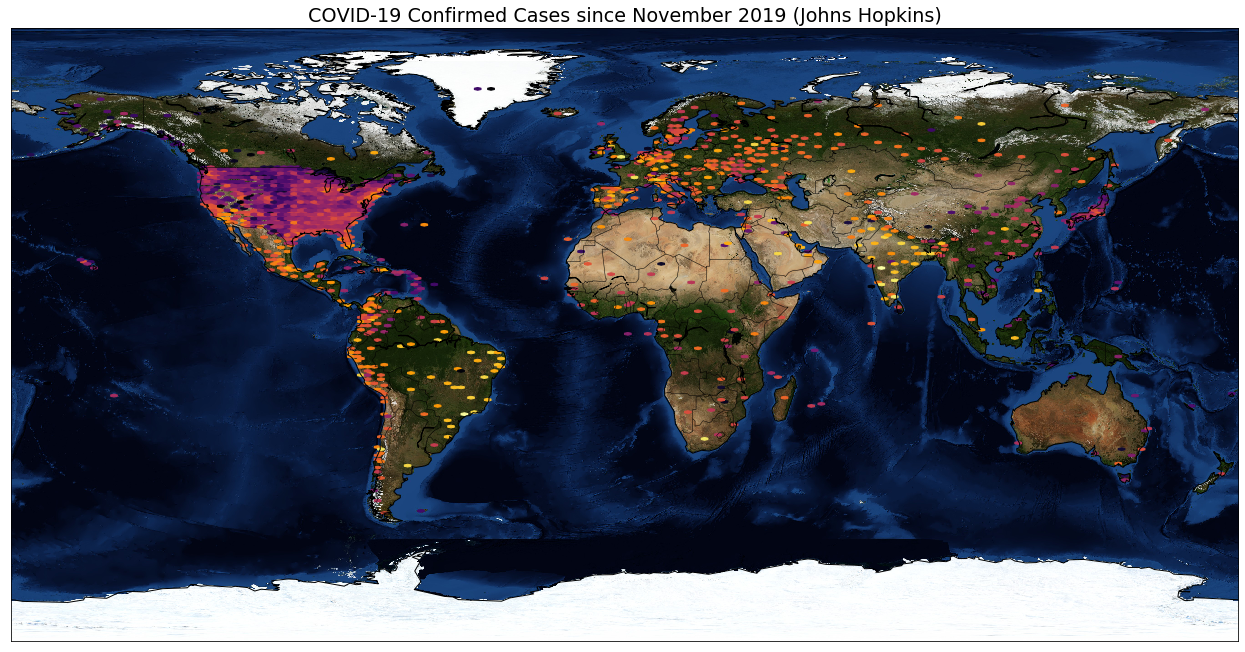

<Figure size 432x288 with 0 Axes>

In [53]:
fig = plt.figure(figsize=(22,12))
m = Basemap()
m.drawcoastlines()
m.drawcountries()

m.bluemarble() # graphic overlay
hx = m.hexbin(x,y,C=C, gridsize=(180), cmap='inferno', bins='log')
# cb = plt.colorbar(hx)
# plt.rcParams.update({'font.size': 16})
plt.title('COVID-19 Confirmed Cases since November 2019 (Johns Hopkins)')
plt.show()
plt.savefig('test.png')

# hex tests look nice
overall looks alright, should tune the hex size generatively perhaps. with data viz ask "why is this useful?"

we could look into arcGIS like John Nelson's chipotles in america hexmap. really interesting overlay. how did he make it interactive? GIS probably

next steps: find more data source, maybe generate a new map for america day-by-day or weekly?
we've got perfect dates, so we might as well

- this is temporal data
    - i could feed it into an HTM...
    - but why? predicting this might not be too useful since spread can be altered by government mandates (not fed into HTM)

i really don't want to accidentally code the wrong sized hexes and have to recalculate the whole database later on
- database ideas
    - store geolocation, coordinate points? how specific - 10 meters? what decimal?
        - geoEncoder from numenta? have to implement it in Core, that'll be tough
    - draw... hexgrids over the map, and store geopoints in hexes accordingly
    - but how do we do this mathematically? it's a problem of "binning", essentially, but on a 2D plane with tessellating shapes